# Group Members
1852529 - Bohlokoa Tilo <br/>
1908649 - Tieho Ramphore <br/>
1908664 - Thando Peter <br/>

In [1]:
# Initialisation Cell
from __future__ import print_function, division
from IPython.display import display, HTML, Javascript
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

sns.set_context("talk")
sns.set_style('darkgrid', {'figure.facecolor': '(0,0,0,0)'}) 
#'axes.facecolor': '(0,0,0,0)'


In [2]:
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from sklearn.utils import resample
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# How personal factors influence income levels and the acquisition of wealth in South Africa
 
## Executive Summary \ Highlights
The purpose of the notebook is to analyse census data from [UCT NIDS databse](http://www.nids.uct.ac.za/nids-data/program-library/derived-files) to determine if:

    1) The conditions in which people are born in determine their income bracket and ability to generate wealth in adulthood.
    2) The relationships people cultivate throughout their lives contribute to their income bracket and ability to generate wealth.
    3) A persons level of education determines the income bracket they can achieve and their ability to generate wealth.

The data we will use to model the conditions in which people are born are:

    1) Year_DOB
    2) Gender
    3) Population_Group
   
The data we will use to model the relationships people cultivate throughout their lives are:

    1) Married_Cohabitation
    2) Years_Married
    3) Years_Cohabiting
    4) Current_Relationship_Status
    5) Given_Birth
    6) Birth_Count
    7) Biological_Children_Living
    
The data we will use to model a persons level of education are:

    1) Mother_Degrees 
    2) Mother_Highest_Tertiary 
    3) Father_Highest_Tertiary 
    4) Employment_Payment 
    5) Highest_Grade_Completed 
    6) Year_Highest_Grade_Completed 
    7) Age_Highest_Grade_Completed 
    8) Highest_Grade_Completed_Pass_Type 
    9) Matric_University_Exemption 
    10) Math_Highest_Grade_Completed 
    11) Other_Math_Highest_Grade_Completed 
    12) Tertiary_Completed 
    13) Highest_Tertiary_Completed 
    14) Other_Highest_Tertiary_Completed 
    15) Year_Tertiary_Completed 
    16) Repeated_School_Grades 
    17) Currently_Enrolled_School 
    18) Other_Currently_Enrolled_School 
    19) Computer_Literate
    20) English_Reading_Level 
    21) English_Writing_Level
    
## Main Results

    1) The conditions in which people are born in determine their income bracket and ability to generate wealth in adulthood.
    - The people born in the 1960s to the early 1970s are the highest earners. The data does not show an even distribution of the income across the years, thus indicating the lack of generational income mobility in South Africa.
    
## Limitations
    
    The data was collected in different years so it was difficult to get the correct ages of each entry. There was not enough generational data on the households. There were no trends that could be followed within a household which made it difficult to follow the generational wealth mobility. 
    
    Due to the scope of the project we could not use multiple datasets in order to analyse different trends and patterns throughout generations.

## Introduction
**Problem Context and Motivation**: <br>
South Africa is one of the world's most unequal countries, with the World Bank reporting that 20% of people in South Africa control almost 70% of the resources. Nonetheless, the country's wealth inequality has received little notice. It is critical to precisely assess the concentration of wealth disparity through time, as well as to determine the core causes of South Africa's current persistence of extraordinarily high levels of inequality. <br> Therefore, in this book, we aim to discover if the inequality is true and if it is, whether education, relationships and birth conditions contribute to it. Our motivation for this study is to find out if it is in the peoples' power to break the chains of poverty and what the best way to go about this is.

**Description of the questions asked**:<br>

    Question 1: Do the conditions in which people are born in determine their income bracket and ability to generate wealth in adulthood?
        There are factors that occur by chance at birth that dictate the life of every person. The factors we explore in this book are race, gender and the year in which a person is born. We aim to find if there are conditions more favorable than others with regards to monetary success in life.
        
    Question 2: Do the relationships people cultivate throughout their lives contribute to their income bracket and ability to generate wealth?
        People have various relationships throughout their lives that last for varying periods. They can remain alone, get married, cohabitate with another and have children. We believe that these relations influence their flow of money and their ability to acquire it. We aim to find out how these relations affect monetary gain and if there are conditions more favorable than others.
    
    Question 3: Does a persons level of education determines the income bracket they can achieve and their ability to generate wealth?
        Through the course of one's life, a person may choose or be forced by circumstance to finish or drop out of grade school, to apply to tertiary or join the workforce, or to pursue a higher degree. These different levels of education have their own advantages and disadvantages. We aim to describe the extent of these advantages with regards to monetary gain. 

**Methodology**:<br>

    1) Remove entries from the dataset that are not complete and are illogical.
    2) Clean the data and enforce a standard for data entry.
    4) Extract and join rows, columns and tables relevant to each question.
    5) Draw exploratory graphs that should help shed light on the data and therefore aid in the answering of the questions.
    6) Write an analysis of the findings and formulate a conclusive answer to each question
    7) Comment on the accuracy of the data in answering the questions and if any improvements can be made.

**Section Contents Overview**:<br>

    The following will be a description of the original datasets, the changes perfromed on these datasets, and initial visualisations on data correlations.

# Reading in the data

In [100]:
#importing data infto dataframe 'df'
df = pd.read_stata('DAE-Data/adult_dataset.dta')

#importing data from 4th and 3rd wave
df1 = pd.read_stata('DAE-Data/w3_adult_data.dta')
df2 = pd.read_stata('DAE-Data/w4_adult_data.dta')

#selecting specific columns from "df"
df_filtered = df.loc[df["w5_a_outcome"] == "Successfully Interviewed",
    ['w5_hhid','w5_a_sample','w5_a_dob_m','w5_a_dob_y','w5_a_gen','w5_a_popgrp','w5_a_mar','w5_a_mary_m','w5_a_mary_l','w5_a_curmarst',
     'w5_a_bhbrth','w5_a_bhcnt1con','w5_a_bhlive','w5_a_mthtertyn','w5_a_mthtert','w5_a_fthtert_o','w5_a_em1','w5_a_em1strty','w5_a_em1inc','w5_a_em1pay',
     'w5_a_em1inc_cat','w5_a_em1hrs','w5_a_em1prf','w5_a_em1prf_a','w5_a_em1prflm','w5_a_em1prflm_a','w5_a_em1bon','w5_a_em1bon_a','w5_a_em1bonlm','w5_a_em1bonlm_a',
     'w5_a_em1pcrt','w5_a_em1pcrt_a','w5_a_em1pcrtlm','w5_a_em1pcrtlm_a','w5_a_em2','w5_a_em2inc','w5_a_em2pay','w5_a_em2inc_cat','w5_a_ems','w5_a_emssll',
     'w5_a_emslft','w5_a_emsincfr_a','w5_a_incgovpen','w5_a_incgovpen_v','w5_a_incdis','w5_a_incdis_v','w5_a_incchld','w5_a_incchld_v','w5_a_incfos','w5_a_incfos_v',
     'w5_a_inccare','w5_a_inccare_v','w5_a_incaid','w5_a_incaid_v','w5_a_incwar','w5_a_incwar_v','w5_a_incuif','w5_a_incuif_v','w5_a_incwc','w5_a_incwc_v',
     'w5_a_incpfnd','w5_a_incpfnd_v','w5_a_incret','w5_a_incret_v','w5_a_incretp','w5_a_incretp_v','w5_a_incrnt','w5_a_incrnt_v','w5_a_incint','w5_a_incint_v',
     'w5_a_incretr','w5_a_incretr_v','w5_a_incinh','w5_a_incinh_v','w5_a_inclob','w5_a_inclob_v','w5_a_incgif','w5_a_incgif_v','w5_a_incloan',
     'w5_a_incloan_v','w5_a_incsale','w5_a_incsale_v','w5_a_inco','w5_a_inco_o','w5_a_inco_v','w5_a_cr',
     'w5_a_edschgrd','w5_a_edschyr','w5_a_edschage','w5_a_ednsc','w5_a_edexemp','w5_a_edschmth','w5_a_edschmth_o','w5_a_edter',
     'w5_a_edterlev','w5_a_edterlev_o','w5_a_edteryr','w5_a_edrep','w5_a_ed17cur',
     'w5_a_ed17curlev_o','w5_a_edlitcomp','w5_a_edlitrden','w5_a_edlitwrten','w5_a_fwbrelinc',
     'w5_a_fwbstp15','w5_a_fwbstp5yr','w5_a_fwbinc5yr','w5_a_recinh','w5_a_recjob','w5_a_recprof','w5_a_recfin',
     'w5_a_reclob','w5_a_recoth','w5_a_ownveh','w5_a_ownveh_v','w5_a_ownmot',
     'w5_a_ownmot_v','w5_a_dtbnd','w5_a_dtbnd_b','w5_a_dtbnd_joint','w5_a_ownoth_ind','w5_a_ownowdtot_indshare','w5_a_dtveh','w5_a_dtveh_b',
     'w5_a_dtveh_joint','w5_a_dtbnk','w5_a_dtbnk_b','w5_a_dtmic','w5_a_dtmic_b',
     'w5_a_dtstubnk','w5_a_dtstubnk_b','w5_a_dtstuo','w5_a_dtstuo_b','w5_a_dtcre','w5_a_dtcre_b','w5_a_dtstr','w5_a_dtstr_b','w5_a_dthp','w5_a_dthp_b',
     'w5_a_dtflloan','w5_a_dtflloan_b','w5_a_dtfrloan','w5_a_dtfrloanbal','w5_a_dtmsh','w5_a_dtmsh_b','w5_a_dtemploan','w5_a_dtemploan_b','w5_a_dtunpdtax','w5_a_dtunpdtax_b',
     'w5_a_dtserarr','w5_a_dtserarr_b','w5_a_dtoth1','w5_a_dtoth1_o','w5_a_dtoth1_b',
     'w5_a_aspen','w5_a_aspen_v','w5_a_aspen_cat','w5_a_asfin','w5_a_asfin_v','w5_a_asfin_cat','w5_a_asacc','w5_a_asacc_v',
     'w5_a_asacc_cat','w5_a_dtacc_cat','w5_a_assell','w5_a_assell_v']]

#column renaming
pd.set_option('mode.chained_assignment', None)
#dictionary for the new column names: key = old name & value = new name
dict={'w5_hhid':'Household_Identifier','w5_a_sample':'Sample_Origin','w5_a_dob_m':'Month_DOB','w5_a_dob_y':'Year_DOB','w5_a_gen':'Gender',
      'w5_a_popgrp':'Population_Group','w5_a_mar':'Married_Cohabitation','w5_a_mary_m':'Years_Married','w5_a_mary_l':'Years_Cohabiting',
      'w5_a_curmarst':'Current_Relationship_Status','w5_a_bhbrth':'Given_Birth','w5_a_bhcnt1con':'Birth_Count','w5_a_bhlive':'Biological_Children_Living',
      'w5_a_mthtertyn':'Mother_Degrees','w5_a_mthtert':'Mother_Highest_Tertiary','w5_a_fthtert_o':'Father_Highest_Tertiary','w5_a_em1':'Employment_Payment',
      'w5_a_em1strty':'Primary_Occupation','w5_a_em1inc':'Primary_Gross_Income_Month','w5_a_em1pay':'Primary_Net_Income_Month','w5_a_em1inc_cat':'Main_Job_Income_Category',
      'w5_a_em1hrs':'Work_Week_Hours','w5_a_em1prf':'Rec_Share_Profit_Year','w5_a_em1prf_a':'Share_Profit_Year','w5_a_em1prflm':'Rec_Share_Profit_Month',
      'w5_a_em1prflm_a':'Share_Profit_Month','w5_a_em1bon':'Rec_Bonus_Year','w5_a_em1bon_a':'Other_Bonus_Year','w5_a_em1bonlm':'Rec_Bonus_Month',
      'w5_a_em1bonlm_a':'Other_Bonus_Month','w5_a_em1pcrt':'Rec_Extra_Income_Year','w5_a_em1pcrt_a':'Extra_Income_Year','w5_a_em1pcrtlm':'Rec_Extra_Income_Month',
      'w5_a_em1pcrtlm_a':'Extra_Income_Month','w5_a_em2':'Have_Secondary_Occupation','w5_a_em2inc':'Secondary_Gross_Income','w5_a_em2pay':'Secondary_Net_Income',
      'w5_a_em2inc_cat':'Secondary_Income_Category','w5_a_ems':'Is_Self_Employed','w5_a_emssll':'Net_After_Liabilities','w5_a_emslft':'Amount_Left_Over',
      'w5_a_emsincfr_a':'Month_Take_Home_Salary','w5_a_incgovpen':'Pension','w5_a_incgovpen_v':'Pension_Amount','w5_a_incdis':'Disability_Grant',
      'w5_a_incdis_v':'Disability_Grant_Amount','w5_a_incchld':'Child_Support','w5_a_incchld_v':'Child_Support_Amount','w5_a_incfos':'Foster_Care_Grant',
      'w5_a_incfos_v':'Foster_Care_Grant_Amount','w5_a_inccare':'Dependency_Grant','w5_a_inccare_v':'Dependency_Grant_Amount','w5_a_incaid':'Grant_In_Aid',
      'w5_a_incaid_v':'Grant_In_Aid_Amount','w5_a_incwar':'War_Veterans_Pension','w5_a_incwar_v':'War_Veterans_Pension_Amount','w5_a_incuif':'UIF',
      'w5_a_incuif_v':'UIF_Amount','w5_a_incwc':'Workers_Compensation','w5_a_incwc_v':'Workers_Compensation_Amount','w5_a_incpfnd':'Provident_Fund',
      'w5_a_incpfnd_v':'Provident_Fund_Amount','w5_a_incret':'Private_Retirement_Annuity','w5_a_incret_v':'Private_Retirement_Annuity_Amount',
      'w5_a_incretp':'Retirement_Package','w5_a_incretp_v':'Retirement_Package_Amount','w5_a_incrnt':'Rental_Income','w5_a_incrnt_v':'Rental_Income_Amount',
      'w5_a_incint':'Interest_Earnings','w5_a_incint_v':'Interest_Earnings_Amount','w5_a_incretr':'Retrenchment_Package','w5_a_incretr_v':'Retrenchment_Package_Amount',
      'w5_a_incinh':'Inheritances','w5_a_incinh_v':'Inheritances_Amount','w5_a_inclob':'Lobola','w5_a_inclob_v':'Lobola_Amount','w5_a_incgif':'Gifts',
      'w5_a_incgif_v':'Gifts_Amount','w5_a_incloan':'Loan_Repayments','w5_a_incloan_v':'Loan_Repayments_Amount','w5_a_incsale':'Sale_Household_Goods',
      'w5_a_incsale_v':'Sale_Household_Goods_Amount','w5_a_inco':'Other_Income','w5_a_inco_o':'Other_Income_Recipient','w5_a_inco_v':'Other_Income_Value',
      'w5_a_cr':'Non_Household_Residents_Contributions','w5_a_edschgrd':'Highest_Grade_Completed','w5_a_edschyr':'Year_Highest_Grade_Completed',
      'w5_a_edschage':'Age_Highest_Grade_Completed','w5_a_ednsc':'Highest_Grade_Completed_Pass_Type','w5_a_edexemp':'Matric_University_Exemption',
      'w5_a_edschmth':'Math_Highest_Grade_Completed','w5_a_edschmth_o':'Other_Math_Highest_Grade_Completed','w5_a_edter':'Tertiary_Completed',
      'w5_a_edterlev':'Highest_Tertiary_Completed','w5_a_edterlev_o':'Other_Highest_Tertiary_Completed','w5_a_edteryr':'Year_Tertiary_Completed',
      'w5_a_edrep':'Repeated_School_Grades','w5_a_ed17cur':'Currently_Enrolled_School','w5_a_ed17curlev_o':'Other_Currently_Enrolled_School',
      'w5_a_edlitcomp':'Computer_Literate','w5_a_edlitrden':'English_Reading_Level','w5_a_edlitwrten':'English_Writing_Level','w5_a_fwbrelinc':'Household_Income_Classification',
      'w5_a_fwbstp15':'Household_Income_Step_15_Years','w5_a_fwbstp5yr':'Household_Income_Step_In_5_Years','w5_a_fwbinc5yr':'Household_Expected_Income_In_5_Years',
      'w5_a_recinh':'Income_Inheritance','w5_a_recjob':'Income_Job_Payout','w5_a_recprof':'Income_Property_Sale','w5_a_recfin':'Income_Financial_Product',
      'w5_a_reclob':'Income_Lobola','w5_a_recoth':'Income_Other_Payout','w5_a_ownveh':'Vehicle_Owner','w5_a_ownveh_v':'Resale_Vehicle','w5_a_ownmot':'Motorcycle_Owner',
      'w5_a_ownmot_v':'Resale_Motorcycle','w5_a_dtbnd':'Has_Home_Loan','w5_a_dtbnd_b':'Home_Loan_Balance','w5_a_dtbnd_joint':'Home_Loan_Joint_Or_Sole',
      'w5_a_ownoth_ind':'Other_Property','w5_a_ownowdtot_indshare':'Other_Property_Balance','w5_a_dtveh':'Vehicle_Payment','w5_a_dtveh_b':'Vehicle_Payment_Balance',
      'w5_a_dtveh_joint':'Vehicle_Payment_Joint_Or_Sole','w5_a_dtbnk':'Bank_Personal_Loan','w5_a_dtbnk_b':'Bank_Personal_Loan_Balance',
      'w5_a_dtmic':'Micro_Lender_Loan','w5_a_dtmic_b':'Micro_Lender_Loan_Balance','w5_a_dtstubnk':'Bank_Study_Loan','w5_a_dtstubnk_b':'Bank_Study_Loan_Balance',
      'w5_a_dtstuo':'Other_Study_Loan','w5_a_dtstuo_b':'Other_Study_Loan_Balance','w5_a_dtcre':'Credit_Card','w5_a_dtcre_b':'Credit_Card_Balance',
      'w5_a_dtstr':'Store_Card','w5_a_dtstr_b':'Store_Card_Balance','w5_a_dthp':'Hire_Purchase_Agreement','w5_a_dthp_b':'Hire_Purchase_Agreement_Balance',
      'w5_a_dtflloan':'Family_Member_Loan','w5_a_dtflloan_b':'Family_Member_Loan_Balance','w5_a_dtfrloan':'Friend_Loan','w5_a_dtfrloanbal':'Friend_Loan_Balance',
      'w5_a_dtmsh':'Mashonisa_Loan','w5_a_dtmsh_b':'Mashonisa_Loan_Balance','w5_a_dtemploan':'Employer_Loan','w5_a_dtemploan_b':'Employer_Loan_Balance',
      'w5_a_dtunpdtax':'Unpaid_Tax','w5_a_dtunpdtax_b':'Unpaid_Tax_Balance','w5_a_dtserarr':'Monthly_Arrears','w5_a_dtserarr_b':'Monthly_Arrears_Balance',
      'w5_a_dtoth1':'Other_Debts','w5_a_dtoth1_o':'Other_Other_Debts','w5_a_dtoth1_b':'Other_Debts_Balance','w5_a_aspen':'Pension_Annuity',
      'w5_a_aspen_v':'Pension_Annuity_Amount','w5_a_aspen_cat':'Pension_Annuity_Category','w5_a_asfin':'Shares','w5_a_asfin_v':'Shares_Amount',
      'w5_a_asfin_cat':'Shares_Category','w5_a_asacc':'Bank_Account','w5_a_asacc_v':'Bank_Account_Balance','w5_a_asacc_cat':'Bank_Account_Category',
      'w5_a_assell':'Possessions_Net_Value','w5_a_assell_v':'Possessions_Net_Value_Balance'}

df1 = df1.loc[df1["w3_a_outcome"] == "Successfully Interviewed",:]
df2 = df2.loc[df2["w4_a_outcome"] == "Successfully Interviewed",:]



df_filtered.rename(columns = dict,inplace = True)

df_filtered['Population_Group'] = df_filtered['Population_Group'].cat.add_categories('Unknown')
df_filtered['Population_Group'].fillna('Unknown', inplace = True)

df_filtered

,Household_Identifier,Sample_Origin,Month_DOB,Year_DOB,Gender,Population_Group,Married_Cohabitation,Years_Married,Years_Cohabiting,Current_Relationship_Status,...,Pension_Annuity_Category,Shares,Shares_Amount,Shares_Category,Bank_Account,Bank_Account_Balance,Bank_Account_Category,w5_a_dtacc_cat,Possessions_Net_Value,Possessions_Net_Value_Balance
0,500000,2017 sample,March,1980,Male,Coloured,Formally married,5,NaN,NaN,...,NaN,No,NaN,NaN,Yes,Dont know,Refused,NaN,Something left over,150000
1,500001,2008 sample,October,1993,Male,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,Yes,0,NaN,NaN,Don't know,NaN
2,500002,2008 sample,September,1979,Female,African,Formally married,13,NaN,NaN,...,NaN,No,NaN,NaN,Yes,4000,NaN,NaN,Something left over,Dont know
3,500002,2008 sample,August,1972,Male,African,Formally married,15,NaN,NaN,...,NaN,No,NaN,NaN,Yes,10000,NaN,NaN,Something left over,Dont know
4,500003,2008 sample,December,1967,Male,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,No,NaN,NaN,NaN,Refused,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30102,513778,2008 sample,December,1983,Female,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,Yes,Dont know,Don't Know,NaN,Don't know,NaN
30103,513779,2008 sample,September,1990,Male,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,Yes,700,NaN,NaN,Something left over,30000
30104,513780,2008 sample,December,1982,Male,Coloured,NaN,NaN,NaN,Divorced or separated,...,NaN,No,NaN,NaN,Yes,Refused,R0,NaN,Something left over,300000
30105,513781,2008 sample,December,1985,Male,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,No,NaN,NaN,NaN,Something left over,1000


## Data Description

The National Income Dynamics Research (NIDS) is South Africa's first national longitudinal study and it served as the main dataset for our project. In 2008 NIDS had its first “Wave” of data collection, which resulted in the collection of a nationally representative sample of close to 7,300 households. The Waves that followed try to conduct interviews on the same households whenever possible. NIDS collects data on a wide range of human resource factors, labour force backgrounds, and demographic characteristics using a mix of household and individual level questionnaires.<br>

For this project, we used the dataset from the 5th and latest Wave which took place between February 2017 and December 2017. We only considered the adult dataset as it contains data on the education, employment status, wages and possessions, among other pertinent variables, of the adults in a household.
The data was downloaded from [UCT NIDS databse](https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/712/datafile/F2/?offset=100&limit=100) on the 22nd of March 2021 by Rutendo Jambwa. Thando and Bohlokoa cleaned the data by extracting the variables the group deemed relevant to our research and changing their names to improve readability. The resulting dataset had 166 columns and 23892 entries (186,178,534 bytes).<br>

Thando further broke down the data into separate subsets, each focusing on specific aspects of the data (e.g. education, income sources, debt, etc..). After which, the individual subsets were further wrangled.<br>

To ensure data consistency, column values and data types were modified where necessary such that each column conforms to a single data type. An entry was removed if it had missing values across all columns. In most cases, where possible, missing values were either filled in using some methods or replaced with standard indicators of missing data (i.e. 9999, 00, etc..).<br>

**Ability to Answer Questions**:<br>

The dataset has descriptive data that is sufficient in the visualising, calculating and answering of the questions posed above. There are no factors, important to the result of each question, that are not contained and described in detail in the dataset. 

As can be seen above the data set has 23892 entries each with at most 166 filled columns. 
### Quality Analysis

After having analysed the whole dataset it can be stated that the data is of good quality. Specific details are highlighted and discussed below.
Off of the first set of entries it can be seen that all the entries follow a standard that was prioritised during data collection. This also means that the values are consistent and realistic. 


As can be seen in the above the information each column has a set data type that is adhered to throughout the dataset, this means the data present follows a set of decided categories, is a value, or is null. Given the above it can be seen that most columns have null values, this is due to the nature of questioning, there are many factors that a participant may not be part of which are then left null. Included in the dataframe are sample entries which contain null values, given that they have unique house_identifier codes they can be cross-referenced to exisitng entries and be removed if they don't match other entries in the dataframe.

Given the size of the dataset and number of present variables per entry we feel that the above dataframe is more than adequate to answer the questions we have regarding income/wealth levels and how they may relate to a series of determining factors. The dataset contains information from the same households over many years which will be instrumental in understanding both income over the course of the decade and wealth generation for the households in the dataset, understanding factors such as the rise/stagnation of education levels and income levels, as well as rising family numbers contrasted with rising debt or a lack of asset accumulation.

# Data Wrangling

In [61]:
df_filtered = df_filtered.dropna(subset=['Year_DOB', 'Gender'])
Personal_Details = df_filtered[['Household_Identifier','Month_DOB','Year_DOB','Gender','Population_Group','Married_Cohabitation','Years_Married','Years_Cohabiting','Current_Relationship_Status',
              'Given_Birth','Birth_Count','Biological_Children_Living','Mother_Degrees','Mother_Highest_Tertiary','Father_Highest_Tertiary','Employment_Payment',
              'Highest_Grade_Completed','Year_Highest_Grade_Completed','Age_Highest_Grade_Completed','Highest_Grade_Completed_Pass_Type','Matric_University_Exemption','Math_Highest_Grade_Completed',
                'Other_Math_Highest_Grade_Completed','Tertiary_Completed','Highest_Tertiary_Completed','Other_Highest_Tertiary_Completed','Year_Tertiary_Completed',
              'Repeated_School_Grades','Currently_Enrolled_School','Other_Currently_Enrolled_School','Computer_Literate','English_Reading_Level','English_Writing_Level']]

# Drop columns with no data
Personal_Details = Personal_Details.dropna(subset=['Year_DOB', 'Gender'])

# Replace values with "Don't know" with 1950.0
Personal_Details = Personal_Details.replace({'Year_DOB': {'Don\'t know': 1950.0}})
# Change datatype from string to float
Personal_Details['Year_DOB'] = Personal_Details['Year_DOB'].astype(str).astype(float)

# Group non-cohabitation categories
# Add the category "No"
Personal_Details['Married_Cohabitation'] = Personal_Details['Married_Cohabitation'].cat.add_categories('No')
# Fill all null values with "No"
Personal_Details['Married_Cohabitation'].fillna('No', inplace = True)
# Replace values: 'Not living together', 'Don\'t know', 'Missing' and 'Refused' with "No"
Personal_Details = Personal_Details.replace({'Married_Cohabitation': {'Not living together': 'No', 'Don\'t know': 'No', 'Missing': 'No', 'Refused': 'No'}})
# Change datatype from object to category
Personal_Details['Married_Cohabitation'] = Personal_Details['Married_Cohabitation'].astype('category')

# Add the category 0.0
Personal_Details['Years_Married'] = Personal_Details['Years_Married'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Years_Married'].fillna(0.0, inplace = True)
# Replace values: 'Dont know' and 'Missing' with 0.0
Personal_Details = Personal_Details.replace({'Years_Married': {'Dont know': 0.0, 'Missing': 0.0}})

# Add the category 0.0
Personal_Details['Years_Cohabiting'] = Personal_Details['Years_Cohabiting'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Years_Cohabiting'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing' and 'Refused' with 0.0
Personal_Details = Personal_Details.replace({'Years_Cohabiting': {'Dont know': 0.0, 'Refused': 0.0, 'Missing': 0.0}})

# Add the category 'Single'
Personal_Details['Current_Relationship_Status'] = Personal_Details['Current_Relationship_Status'].cat.add_categories('Single')
# Replace all null values with 'Single'
Personal_Details['Current_Relationship_Status'].fillna('Single', inplace = True)
Personal_Details = Personal_Details.replace({'Current_Relationship_Status': {'Don\'t know': 'Single', 'Refused': 'Single'}})
# Change datatype from object to category
Personal_Details['Current_Relationship_Status'] = Personal_Details['Current_Relationship_Status'].astype('category')
# Change datatype from object to category
Personal_Details['Father_Highest_Tertiary'] = Personal_Details['Father_Highest_Tertiary'].astype('category')

# Replace all null values with 'No'
Personal_Details['Given_Birth'].fillna('No', inplace = True)

# Add the category 0.0
Personal_Details['Birth_Count'] = Personal_Details['Birth_Count'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Birth_Count'].fillna(0.0, inplace = True)

# Replace all null values with 'No'
Personal_Details['Mother_Degrees'].fillna('No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Mother_Degrees': {'Don\'t know': 'No', 'Refused': 'No', 'Missing':'No'}})
# Change datatype from object to category
Personal_Details['Mother_Degrees'] = Personal_Details['Mother_Degrees'].astype('category')

# Add the category 0.0
Personal_Details['Year_Highest_Grade_Completed'] = Personal_Details['Year_Highest_Grade_Completed'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Year_Highest_Grade_Completed'].fillna(0.0, inplace = True)
# Replace values: 'Don't know', 'Missing', 'Not Applicable' and 'Refused' with 0.0
Personal_Details = Personal_Details.replace({'Year_Highest_Grade_Completed': {'Missing':0.0 ,'Not Applicable': 0.0, 'Refused': 0.0, 'Don\'t know': 0.0}})

# Add the category 0.0
Personal_Details['Age_Highest_Grade_Completed'] = Personal_Details['Age_Highest_Grade_Completed'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Age_Highest_Grade_Completed'].fillna(0.0, inplace = True)
# Replace values: 'Don't know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Personal_Details = Personal_Details.replace({'Age_Highest_Grade_Completed': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})

# Calculate and assign the age when the highest grade was completed for values that are equal  to 0
Age_Highest_Grade_Completed = Personal_Details['Year_Highest_Grade_Completed'] - Personal_Details['Year_DOB']
for i, v in Age_Highest_Grade_Completed.items():
    if(Personal_Details['Age_Highest_Grade_Completed'][i] == 0 and v>0):
        Personal_Details['Age_Highest_Grade_Completed'][i] = v
        
#Replacing the values of the highest grade achieved column with the terms currently used
new_edu_vals = {'Grade R/0':'Grade R','Grade 1/Sub A/Class 1':'Grade 1','Grade 2/Sub B/Class 2':'Grade 2','Grade 3/Std. 1':'Grade 3','Grade 4/Std. 2':'Grade 4','Grade 5/Std. 3':'Grade 5','Grade 6/Std. 4':'Grade 6','Grade 8/Std. 6/Form 1':'Grade 8','Grade 12/Std. 10/Form 5/Matric/Senior Certificate':'Grade 12','Grade 10/Std. 8/Form 3':'Grade 10','Grade 11/Std. 9/Form 4':'Grade 11','Grade 9/Std. 7/Form 2':'Grade 9','Grade 7/Std. 5':'Grade 7'}

# Replace values in "Math_Highest_Grade_Completed" and "Highest_Grade_Completed" with the values in new_edu_vals
Personal_Details = Personal_Details.replace({'Math_Highest_Grade_Completed': new_edu_vals}) # The data still has random numbers and vocational certificates
Personal_Details = Personal_Details.replace({'Highest_Grade_Completed': new_edu_vals})
# Change datatype from object to category
Personal_Details['Highest_Grade_Completed'] = Personal_Details['Highest_Grade_Completed'].astype('category')
# Change datatype from object to category
Personal_Details['Math_Highest_Grade_Completed'] = Personal_Details['Math_Highest_Grade_Completed'].astype('category')
    
Personal_Details = Personal_Details.replace({'Other_Math_Highest_Grade_Completed': {'':'No','N6 Deploma':'No','N6 Diploma':'No','Respondent Say All Levels':'Grade 12','Didn\'T Do Mathematics At School. It Used To Be Called Dipalo Back Then.':'No','According To The Respondent She Never Did Mathematics At School':'No','The Respondent Said She Didnt Do Any Mathematics Course But She Did An Arethmatic':'No','Respondent Never Had Mathemetics On School But Had Accountncy Instead':'No','The Respondent Say\'S She Did Not Do Mathematics At School':'No','The Respondent Say He Never Did Mathematics At School':'No','No Mathematics In Dissabled School.':'No','Never Did Mathematics At School.':'No','-3':'No','Respondent Never Did Mathematics At School':'No','The Respondent Never Did Matahematics At School.':'No','The Respondent Says She Never Did Mathematics At School.':'No','The Respondent Says He Never Did Mathematics At School':'No','She Was In Disabled School':'No','The Respondent Does Not Remember':'No','Respondent Did Not Do Mathematics At School.':'No','Not At All':'No','He Confirmed That He Nver Studied Mathematics':'No','No Grades':'No','Thr Respondent Never Did Mathematics At Work':'No','No Grades Respondent Attenden A Special School':'No','Never':'No','Maths Leteracy':'No','Never Did Mathematics At School. He\'S Doing Maths Literary.':'No','The Respondend Says She Never Studied Mathematics At School':'No','A-Level':'Grade 12','The Respondent Ddnt Do Maths At School':'No','Ptc':'No','He Did Not Do Mathematics':'No','Didnt Finish School Left After Standard 5':'No','None':'No','He Didn\'T Study Maths':'No','Cop Is What The Respondent Studied From Over Seas He Used The American Syllabus Not From South Africa':'No','There Was No Mathematics As A Subject Back When She Was Still In School.':'No','She Did Mathematics Up Until Her A Level(Grade 12)':'No','The Was No Mathematics At The Time He Was Schooling':'No','Sester(Grade 6 In Mozambican Education System)':'No','Nover Did Mathematics':'No','Never Did Maths At All':'No','Never Had Any Maths As Subject In School':'No','Didnt Pass With Maths':'No','She Was Attending Special School':'No','Form 6':'Grade 12','No Grades Its A Special .School':'No','Not Doing Grades':'No','Respondent Never Did Mathematics At School.':'No','She Never Did Mathematics At School':'No','I Didnt I Left School Early':'No','He Never Did Mathematics':'No','Never Studied Maths':'No','Did Not Have Mathematics That Time':'No','Form C':'Grade 10','Jc':'No','The Respondent Say She Never Study Mathematics At School':'No','A Level(Grade 12)':'Grade 12','The Respondent Says She Never Did Matric':'Grade 11','She Did Mathematics Till She Completed School':'Grade 12','He Did To It Untill He Finish School.':'Grade 12','According To The Respondent He Never Did Mathematics At School':'No','According To The Respondent She Never Did Maths At Schoool':'No','He Is Attending Trade School':'No','She Didn\'T Study Mathematics':'No','The Respondent Says She Ddnt Do Mathematics':'No','Respondent Says She Did Arithmetic And Not Mathematics.':'No','The Respondent Says She Ddnt Do Mathematics At School':'No','She Did Not Do Mathematics At School.':'No','Did Not Do Maths':'No','They Just Teach Them How To Their Self Only':'No','Never Did Maths':'No','The Was No At The Time He Was Schooling':'No','Never Did Mathematics At School. She\'S Doing Maths Literacy.':'No','Respondent Didn\'T Do Mathtematics At School.':'No','He Was Attending A Special School, Did Not Have Grade.':'No','Never Did Mathematics At School. Was Doing Maths Literacy.':'No','She Says She Never Did Mathematics At School':'No','The Respondent Says He Has Never Done Mathematics At School.':'No','The Respondent Sais She Never Studied Mathematics':'No','Didn\'T Do Mathematics At School':'No','Did Not Do Mathematics':'No','Did Not Do Mathematics At All':'No','Respondent Never Id Pure Mathemathics At School':'No','Did Not Do Maths At High School':'No','Never Did Mathematics':'No'}})
# Change datatype from object to category
Personal_Details['Other_Math_Highest_Grade_Completed'] = Personal_Details['Other_Math_Highest_Grade_Completed'].astype('category')

# Add category 'None'
Personal_Details['Highest_Tertiary_Completed'] = Personal_Details['Highest_Tertiary_Completed'].cat.add_categories('None')
# Replace all null values with 'None'
Personal_Details['Highest_Tertiary_Completed'].fillna( 'None', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'None'
Personal_Details = Personal_Details.replace({'Highest_Tertiary_Completed': {'Missing':'None' , 'Refused':'None' , 'Don\'t know':'None' }})
# Change datatype from object to category
Personal_Details['Highest_Tertiary_Completed'] = Personal_Details['Highest_Tertiary_Completed'].astype('category')

# Replace all null values with 'No'
Personal_Details['Tertiary_Completed'].fillna( 'No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Tertiary_Completed': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Assign 'Yes' to 'Tertiary_Completed' if 'Highest_Tertiary_Completed' has a value
Personal_Details['Tertiary_Completed'][i] = ('Yes' for i, v in Personal_Details['Highest_Tertiary_Completed'] if v!='None')
# index 30 109 had to be fixed individualy
Personal_Details['Tertiary_Completed'][30109] = 'No'
# Change datatype from object to category
Personal_Details['Tertiary_Completed'] = Personal_Details['Tertiary_Completed'].astype('category')

# Replace values: 'Don't know', 'Missing', 'Not Applicable' and 'Refused' with None
Personal_Details = Personal_Details.replace({'Year_Tertiary_Completed': {'Missing':None , 'Not Applicable':None , 'Refused':None , 'Don\'t know':None }})

# Replace values: 'Don't know', 'Missing' and 'Refused' with None
Personal_Details = Personal_Details.replace({'Repeated_School_Grades': {'Missing':None , 'Refused':None , 'Don\'t know':None }})
# Change datatype from object to category
Personal_Details['Repeated_School_Grades'] = Personal_Details['Repeated_School_Grades'].astype('category')

# Replace all null values with 'No'
Personal_Details['Currently_Enrolled_School'].fillna( 'No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Currently_Enrolled_School': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Change datatype from object to category
Personal_Details['Currently_Enrolled_School'] = Personal_Details['Currently_Enrolled_School'].astype('category')

# Replace all null values with 'No'
Personal_Details['Computer_Literate'].fillna( 'No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Computer_Literate': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Change datatype from object to category
Personal_Details['Computer_Literate'] = Personal_Details['Computer_Literate'].astype('category')

# Replace all null values with 'Not well'
Personal_Details['English_Reading_Level'].fillna( 'Not well', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'Not well'
Personal_Details = Personal_Details.replace({'English_Reading_Level': {'Missing':'Not well' , 'Refused':'Not well' , 'Don\'t know':'Not well' }})
# Change datatype from object to category
Personal_Details['English_Reading_Level'] = Personal_Details['English_Reading_Level'].astype('category')

# Replace all null values with 'Not well'
Personal_Details['English_Writing_Level'].fillna( 'Not well', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'Not well'
Personal_Details = Personal_Details.replace({'English_Writing_Level': {'Missing':'Not well' , 'Refused':'Not well' , 'Don\'t know':'Not well' }})
# Change datatype from object to category
Personal_Details['English_Writing_Level'] = Personal_Details['English_Writing_Level'].astype('category')

#calculating then adding age to the Personal_details
sample_year = df_filtered['Sample_Origin'].str[:4]
sample_year = sample_year.astype(int)
birth_year = Personal_Details['Year_DOB'].astype(int)
age = sample_year - birth_year
Personal_Details.insert(loc=5,column='Age',value=age)

#display(Personal_Details)

In [133]:
Asset_Details = df_filtered[['Is_Self_Employed','Net_After_Liabilities','Amount_Left_Over','Vehicle_Owner','Resale_Vehicle','Motorcycle_Owner',
                             'Resale_Motorcycle','Pension_Annuity','Pension_Annuity_Amount','Pension_Annuity_Category','Shares','Shares_Amount','Shares_Category',
                             'Bank_Account','Bank_Account_Balance','Bank_Account_Category','Possessions_Net_Value','Possessions_Net_Value_Balance']]

# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Asset_Details = Asset_Details.replace({'Is_Self_Employed': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Change datatype from object to category
Asset_Details['Is_Self_Employed'] = Asset_Details['Is_Self_Employed'].astype('category')

# Replace values: 'Dont know', 'Not applicable' and 'Refused' with None
Asset_Details = Asset_Details.replace({'Amount_Left_Over': {'Not applicable':None , 'Refused':None , 'Dont know':None }})

# Add the categories 'Profit' and 'Loss'
Asset_Details['Net_After_Liabilities'] = Asset_Details['Net_After_Liabilities'].cat.add_categories('Profit')
Asset_Details['Net_After_Liabilities'] = Asset_Details['Net_After_Liabilities'].cat.add_categories('Loss')
# Loop over values of Amount_left_Over and correct the self employment columns if there is an amount 
for i, v in Asset_Details['Amount_Left_Over'].items():
    if pd.isna(v):
        Asset_Details['Is_Self_Employed'][i] = 'No'
        Asset_Details['Net_After_Liabilities'][i] = None
        Asset_Details['Amount_Left_Over'][i] = 0.0
    else:
        Asset_Details['Is_Self_Employed'][i] = 'Yes'
        if v<0:
            Asset_Details['Net_After_Liabilities'][i] = 'Loss'
        elif v>0:
            Asset_Details['Net_After_Liabilities'][i] = 'Profit'
        else:
            Asset_Details['Net_After_Liabilities'][i] = 'Breakeven'
# Change datatype from object to category
Asset_Details['Net_After_Liabilities'] = Asset_Details['Net_After_Liabilities'].astype('object').astype('category')

def clean_owner_resale( Asset_Details, col1, col2):
    # Change datatype to 'object'
    Asset_Details[col1] = Asset_Details[col1].astype('object')
    # Replace values: 'Don't know', 'Dont know', 'Not applicable', 'Missing' and 'Refused' with None
    Asset_Details = Asset_Details.replace({col2: {'Not applicable':None , 'Refused':None , 'Dont know':None , 'Don\'t know':None , 'Missing':None }})
    # If the column 2 variable is null, then store 'No' in the column 1 variable and initialize column2 to 0.0
    for i, v in Asset_Details[col2].items():
        if pd.isna(v):
            Asset_Details[col1][i] = 'No'
            Asset_Details[col2][i] = 0.0
        else:
            Asset_Details[col1][i] = 'Yes'
    # Change datatype from object to category
    Asset_Details[col1] = Asset_Details[col1].astype('category')
    # Change datatype from object to float
    Asset_Details[col2] = Asset_Details[col2].astype('float')
    return Asset_Details

# Acquire the value in amount and categorize it in the right bracket
def clean_amount_category(Asset_Details, amount, category):
    # Change datatype to object to allow for new values
    Asset_Details[category] = Asset_Details[category].astype('object')
    for i, v in Asset_Details[amount].items():
        if v<-100000:
            Asset_Details[category][i] = '>R100,000 in overdraft'
        elif v>=-100000 and v<=-50001:
            Asset_Details[category][i] = 'R50,001-R100,000 in overdraft'
        elif v>=-50000 and v<=-5001:
            Asset_Details[category][i] = 'R5,001-R50,000 in overdraft'
        elif v>=-5000 and v<=-501:
            Asset_Details[category][i] = 'R501-R5,000 in overdraft'
        elif v>=-500 and v<0:
            Asset_Details[category][i] = 'R1-R500 in overdraft'
        elif v<=500 and v>=0:
            Asset_Details[category][i] = 'R500'
        elif v>=501 and v<=4999:
            Asset_Details[category][i] = 'R501-R4,999'
        elif v==5000:
            Asset_Details[category][i] = 'R5,000'
        elif v>=5001 and v<=49999:
            Asset_Details[category][i] = 'R5,001-R49,999'
        elif v==50000:
            Asset_Details[category][i] = 'R50,000'
        elif v>=50001 and v<=499999:
            Asset_Details[category][i] = 'R50,001-R499,999'
        elif v==500000:
            Asset_Details[category][i] = 'R500,000'
        elif v>=500001 and v<=999999:
            Asset_Details[category][i] = 'R500,001-R999,999'
        elif v==1000000:
            Asset_Details[category][i] = 'R1,000,000'
        elif v>=1000001 and v<=4999999:
            Asset_Details[category][i] = 'R1,000,001-R4,999,999'
        elif v==5000000:
            Asset_Details[category][i] = 'R5,000,000'
        elif v>5000000:
            Asset_Details[category][i] = '>R5,000,000'
    # Change datatype from object to category
    Asset_Details[category] = Asset_Details[category].astype('category')
    return Asset_Details

Asset_Details = clean_owner_resale(Asset_Details, 'Vehicle_Owner', 'Resale_Vehicle')
Asset_Details = clean_owner_resale(Asset_Details, 'Motorcycle_Owner', 'Resale_Motorcycle')

Asset_Details = clean_owner_resale(Asset_Details, 'Pension_Annuity', 'Pension_Annuity_Amount')
Asset_Details = clean_amount_category(Asset_Details, 'Pension_Annuity_Amount', 'Pension_Annuity_Category')

Asset_Details = clean_owner_resale(Asset_Details, 'Shares', 'Shares_Amount')
Asset_Details = clean_amount_category(Asset_Details, 'Shares_Amount', 'Shares_Category')

Asset_Details = clean_owner_resale(Asset_Details, 'Bank_Account', 'Bank_Account_Balance')
Asset_Details = clean_amount_category(Asset_Details, 'Bank_Account_Balance', 'Bank_Account_Category')

Asset_Details = clean_owner_resale(Asset_Details, 'Possessions_Net_Value', 'Possessions_Net_Value_Balance')


In [134]:
for x in ['Possessions_Net_Value_Balance']:
    q75,q25 = np.percentile(Asset_Details.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max_val = q75+(1.5*intr_qr)
    min_val = q25-(1.5*intr_qr)
 
    Asset_Details.loc[Asset_Details[x] < min_val,x] = np.nan
    Asset_Details.loc[Asset_Details[x] > max_val,x] = np.nan
    Asset_Details = Asset_Details[Asset_Details['Possessions_Net_Value_Balance'].notna()]
    Asset_Details = Asset_Details[Asset_Details['Possessions_Net_Value_Balance']>0.0]
    Asset_Details = Asset_Details[(np.abs(stats.zscore(Asset_Details['Possessions_Net_Value_Balance'])) < 3)]

In [101]:
Income_Details = df_filtered[['Employment_Payment','Primary_Gross_Income_Month','Primary_Net_Income_Month','Main_Job_Income_Category',
                              'Work_Week_Hours','Rec_Share_Profit_Year','Share_Profit_Year','Rec_Share_Profit_Month','Share_Profit_Month','Rec_Bonus_Year',
                              'Other_Bonus_Year','Rec_Bonus_Month','Other_Bonus_Month','Rec_Extra_Income_Year','Extra_Income_Year','Rec_Extra_Income_Month',
                              'Extra_Income_Month','Have_Secondary_Occupation','Secondary_Gross_Income','Secondary_Net_Income','Secondary_Income_Category',
                              'Is_Self_Employed','Month_Take_Home_Salary','Pension','Pension_Amount','Disability_Grant','Disability_Grant_Amount','Child_Support',
                              'Child_Support_Amount','Foster_Care_Grant','Foster_Care_Grant_Amount','Dependency_Grant','Dependency_Grant_Amount','Grant_In_Aid',
                              'Grant_In_Aid_Amount','War_Veterans_Pension','War_Veterans_Pension_Amount','UIF','UIF_Amount','Workers_Compensation',
                              'Workers_Compensation_Amount','Provident_Fund','Provident_Fund_Amount','Private_Retirement_Annuity',
                              'Private_Retirement_Annuity_Amount','Retirement_Package','Retirement_Package_Amount','Rental_Income','Rental_Income_Amount',
                              'Interest_Earnings','Interest_Earnings_Amount','Retrenchment_Package','Retrenchment_Package_Amount','Inheritances',
                              'Inheritances_Amount','Lobola','Lobola_Amount','Gifts','Gifts_Amount','Loan_Repayments','Loan_Repayments_Amount',
                              'Sale_Household_Goods','Sale_Household_Goods_Amount','Other_Income','Other_Income_Recipient','Other_Income_Value',
                              'Household_Income_Classification','Household_Income_Step_15_Years',
                              'Household_Income_Step_In_5_Years','Household_Expected_Income_In_5_Years']]

# Replace all null values with 0.0
Income_Details['Primary_Gross_Income_Month'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Primary_Gross_Income_Month': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})
# Replace all null values with 0.0
Income_Details['Primary_Net_Income_Month'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Primary_Net_Income_Month': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})


def clean_payment_existence( Income_Details, col1, col2):
    Income_Details[col2] = Income_Details[col2].astype('object')
    # Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
    Income_Details = Income_Details.replace({col2: {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})
    # Replace all null values with 0.0
    Income_Details[col2].fillna(0.0, inplace = True)
    for i, v in Income_Details[col2].items():
        if v>0:
            Income_Details[col1][i] = 'Yes'
        else:
            Income_Details[col1][i] = 'No'
    # Change datatype from object to category
    Income_Details[col1] = Income_Details[col1].astype('object').astype('category')
    return Income_Details

Income_Details = clean_payment_existence( Income_Details, 'Employment_Payment', 'Primary_Gross_Income_Month')
Personal_Details['Employment_Payment'] = Income_Details['Employment_Payment']

Income_Details = clean_amount_category(Income_Details, 'Primary_Net_Income_Month', 'Main_Job_Income_Category')

# Replace all null values with 0.0
Income_Details['Work_Week_Hours'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Work_Week_Hours': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})

Income_Details = clean_payment_existence( Income_Details, 'Rec_Share_Profit_Year', 'Share_Profit_Year')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Share_Profit_Month', 'Share_Profit_Month')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Bonus_Year', 'Other_Bonus_Year')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Bonus_Month', 'Other_Bonus_Month')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Extra_Income_Year', 'Extra_Income_Year')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Extra_Income_Month', 'Extra_Income_Month')
Income_Details = clean_payment_existence( Income_Details, 'Have_Secondary_Occupation', 'Secondary_Gross_Income')
Income_Details = clean_payment_existence( Income_Details, 'Have_Secondary_Occupation', 'Secondary_Net_Income')

Income_Details = clean_amount_category(Income_Details, 'Secondary_Net_Income', 'Secondary_Income_Category')

Income_Details = clean_payment_existence(Income_Details, 'Is_Self_Employed', 'Month_Take_Home_Salary')
Income_Details = clean_payment_existence(Income_Details, 'Pension', 'Pension_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Disability_Grant', 'Disability_Grant_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Child_Support', 'Child_Support_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Foster_Care_Grant', 'Foster_Care_Grant_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Dependency_Grant', 'Dependency_Grant_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Grant_In_Aid', 'Grant_In_Aid_Amount')
Income_Details = clean_payment_existence(Income_Details, 'War_Veterans_Pension', 'War_Veterans_Pension_Amount')
Income_Details = clean_payment_existence(Income_Details, 'UIF', 'UIF_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Workers_Compensation', 'Workers_Compensation_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Workers_Compensation', 'Workers_Compensation_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Provident_Fund', 'Provident_Fund_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Private_Retirement_Annuity', 'Private_Retirement_Annuity_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Retirement_Package', 'Retirement_Package_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Rental_Income', 'Rental_Income_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Interest_Earnings', 'Interest_Earnings_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Retrenchment_Package', 'Retrenchment_Package_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Inheritances', 'Inheritances_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Lobola', 'Lobola_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Gifts', 'Gifts_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Loan_Repayments', 'Loan_Repayments_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Sale_Household_Goods', 'Sale_Household_Goods_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Other_Income', 'Other_Income_Value')

# Replace all null values with 0.0
Income_Details['Household_Expected_Income_In_5_Years'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Household_Expected_Income_In_5_Years': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})

In [112]:

for x in ['Primary_Gross_Income_Month']:
    q75,q25 = np.percentile(Income_Details.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max_val = q75+(1.5*intr_qr)
    min_val = q25-(1.5*intr_qr)
 
    Income_Details.loc[Income_Details[x] < min,x] = np.nan
    Income_Details.loc[Income_Details[x] > max,x] = np.nan
    Income_Details = Income_Details[Income_Details['Primary_Gross_Income_Month'].notna()]
    Income_Details = Income_Details[Income_Details['Primary_Gross_Income_Month']>0.0]
    Income_Details = Income_Details[(np.abs(stats.zscore(Income_Details['Primary_Gross_Income_Month'])) < 3)]

In [96]:
Liability_Details = df_filtered[['Has_Home_Loan','Home_Loan_Balance','Other_Property','Other_Property_Balance',
                                 'Vehicle_Payment','Vehicle_Payment_Balance','Bank_Personal_Loan','Bank_Personal_Loan_Balance',
                                 'Micro_Lender_Loan','Micro_Lender_Loan_Balance','Bank_Study_Loan','Bank_Study_Loan_Balance','Other_Study_Loan','Other_Study_Loan_Balance',
                                 'Credit_Card','Credit_Card_Balance','Store_Card','Store_Card_Balance','Hire_Purchase_Agreement','Hire_Purchase_Agreement_Balance',
                                 'Family_Member_Loan','Family_Member_Loan_Balance','Friend_Loan','Friend_Loan_Balance','Mashonisa_Loan','Mashonisa_Loan_Balance',
                                 'Employer_Loan','Employer_Loan_Balance','Unpaid_Tax','Unpaid_Tax_Balance','Monthly_Arrears','Monthly_Arrears_Balance','Other_Debts',
                                 'Other_Debts_Balance']]

Liability_Details = clean_payment_existence(Liability_Details, 'Has_Home_Loan', 'Home_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Other_Debts', 'Other_Debts_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Unpaid_Tax', 'Unpaid_Tax_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Employer_Loan', 'Employer_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Family_Member_Loan', 'Family_Member_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Bank_Study_Loan', 'Bank_Study_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Hire_Purchase_Agreement', 'Hire_Purchase_Agreement_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Other_Study_Loan', 'Other_Study_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Bank_Personal_Loan', 'Bank_Personal_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Vehicle_Payment', 'Vehicle_Payment_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Micro_Lender_Loan', 'Micro_Lender_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Friend_Loan', 'Friend_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Credit_Card', 'Credit_Card_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Mashonisa_Loan', 'Mashonisa_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Store_Card', 'Store_Card_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Other_Property', 'Other_Property_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Monthly_Arrears', 'Monthly_Arrears_Balance')

## Sense checks after cleaning (raw vs cleaned)<br>

The values represent the unique values that were removed.

In [83]:
print(Personal_Details.nunique() - df_filtered[['Household_Identifier','Month_DOB','Year_DOB','Gender','Population_Group','Married_Cohabitation','Years_Married','Years_Cohabiting','Current_Relationship_Status',
              'Given_Birth','Birth_Count','Biological_Children_Living','Mother_Degrees','Mother_Highest_Tertiary','Father_Highest_Tertiary','Employment_Payment',
              'Highest_Grade_Completed','Year_Highest_Grade_Completed','Age_Highest_Grade_Completed','Highest_Grade_Completed_Pass_Type','Matric_University_Exemption','Math_Highest_Grade_Completed',
                'Other_Math_Highest_Grade_Completed','Tertiary_Completed','Highest_Tertiary_Completed','Other_Highest_Tertiary_Completed','Year_Tertiary_Completed',
              'Repeated_School_Grades','Currently_Enrolled_School','Other_Currently_Enrolled_School','Computer_Literate','English_Reading_Level','English_Writing_Level']].nunique())

Age                                    NaN
Age_Highest_Grade_Completed           30.0
Biological_Children_Living             0.0
Birth_Count                            1.0
Computer_Literate                     -3.0
Current_Relationship_Status           -1.0
Currently_Enrolled_School             -3.0
Employment_Payment                    -3.0
English_Reading_Level                 -3.0
English_Writing_Level                 -3.0
Father_Highest_Tertiary                0.0
Gender                                 0.0
Given_Birth                            0.0
Highest_Grade_Completed                0.0
Highest_Grade_Completed_Pass_Type      0.0
Highest_Tertiary_Completed            -2.0
Household_Identifier                   0.0
Married_Cohabitation                  -3.0
Math_Highest_Grade_Completed           0.0
Matric_University_Exemption            0.0
Month_DOB                              0.0
Mother_Degrees                        -3.0
Mother_Highest_Tertiary                0.0
Other_Curre

In [84]:
print(Asset_Details.nunique() - df_filtered[['Is_Self_Employed','Net_After_Liabilities','Amount_Left_Over','Vehicle_Owner','Resale_Vehicle','Motorcycle_Owner',
                             'Resale_Motorcycle','Pension_Annuity','Pension_Annuity_Amount','Pension_Annuity_Category','Shares','Shares_Amount','Shares_Category',
                             'Bank_Account','Bank_Account_Balance','Bank_Account_Category','Possessions_Net_Value','Possessions_Net_Value_Balance']].nunique())

Is_Self_Employed                -3
Net_After_Liabilities           -3
Amount_Left_Over                -3
Vehicle_Owner                   -3
Resale_Vehicle                  -3
Motorcycle_Owner                -3
Resale_Motorcycle               -2
Pension_Annuity                 -3
Pension_Annuity_Amount          -3
Pension_Annuity_Category        -2
Shares                          -3
Shares_Amount                   -2
Shares_Category                  2
Bank_Account                    -3
Bank_Account_Balance            -4
Bank_Account_Category            3
Possessions_Net_Value           -4
Possessions_Net_Value_Balance   -5
dtype: int64


<AxesSubplot:>

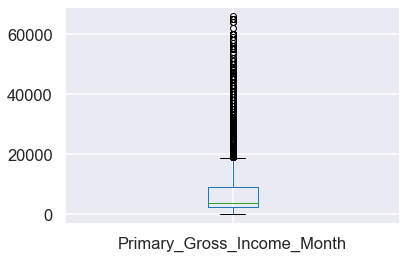

In [121]:
from scipy import stats

Income_Details.boxplot('Primary_Gross_Income_Month') 

<AxesSubplot:>

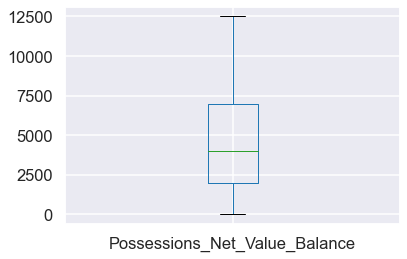

In [136]:
Asset_Details.boxplot('Possessions_Net_Value_Balance') 

## 3. Exploratory Analysis
***

### Can the gender and race of an adult in South Africa be used to determine their income bracket and the overall amount of wealth they possess?

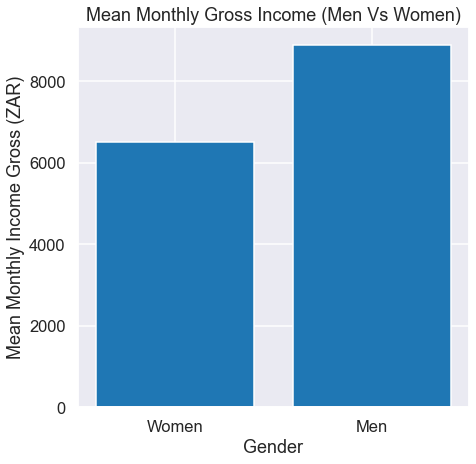

In [143]:
fem_mean_income = Income_Details.loc[Personal_Details['Gender'] == 'Female','Primary_Gross_Income_Month'].mean()
male_mean_income =Income_Details.loc[Personal_Details['Gender'] == 'Male','Primary_Gross_Income_Month'].mean()
means = [fem_mean_income,male_mean_income]
gender = ['Women','Men']

plt.figure(figsize=(7,7))
plt.bar(gender, means)

plt.title('Mean Monthly Gross Income (Men Vs Women)')
plt.xlabel('Gender')
plt.ylabel('Mean Monthly Income Gross (ZAR)')
plt.show()

The above graph indicates the significant inequality between the mean monthly gross income between men and females. We can further use statistics to determine that the income inequality between genders is bias towards men, leaving women with less income than their male counterparts. Therefore indicating that gender plays a factor in where one will end up in the income spectrum compared to their gender counterparts. This therefore brings us to the following hypothesis:

* H<sub>0</sub>: There is no difference between the mean monthly gross incomes of men and women.
* H<sub>1</sub>: Men have a higher mean monthly gross income than women.

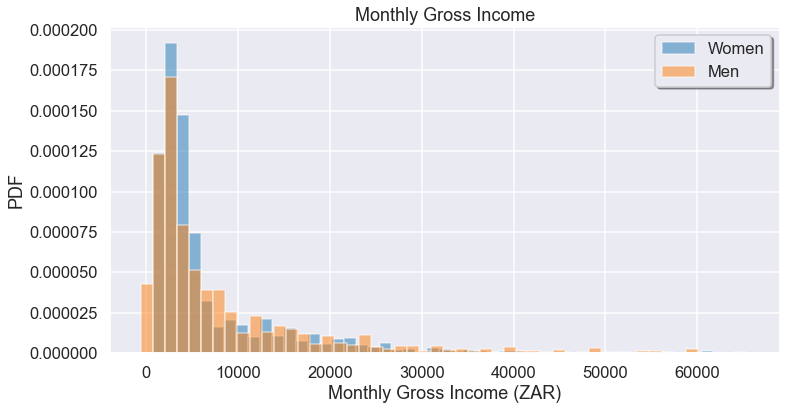

In [149]:
# Here we look at the distributions of the gross incomes for each gender for the 2017 dataset
# to determine if the distributions are similiar to allow for the u-test.
fem_incomes = Income_Details.loc[Personal_Details['Gender'] == 'Female','Primary_Gross_Income_Month']
male_incomes =Income_Details.loc[Personal_Details['Gender'] == 'Male','Primary_Gross_Income_Month']
plt.figure(figsize=(12,6))
fem_incomes.plot.hist(bins=50, align='right', alpha=0.5,label = 'Women',  density = True)
male_incomes.plot.hist(bins=50, align='left', alpha=0.5, label = 'Men', density = True)
plt.title('Monthly Gross Income')
plt.xlabel('Monthly Gross Income (ZAR)'); plt.ylabel('PDF'); plt.legend(shadow=True);


In [146]:
#First we'll check the Mann-Whitney test as we have an underlying exponential distribution for the monthly gross income
from scipy import stats
fem_income_data = Income_Details[Personal_Details['Gender'] == 'Female']['Primary_Gross_Income_Month']
male_income_data = Income_Details[Personal_Details['Gender'] == 'Male']['Primary_Gross_Income_Month']
u,p = stats.mannwhitneyu(fem_income_data,male_income_data)
print('Statistic=%.1f, p=%.3f' % (u, p))

Statistic=3938639.0, p=0.000


<ipython-input-146-7b54e71a4093>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_income_data = Income_Details[Personal_Details['Gender'] == 'Female']['Primary_Gross_Income_Month']
<ipython-input-146-7b54e71a4093>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_income_data = Income_Details[Personal_Details['Gender'] == 'Male']['Primary_Gross_Income_Month']


In [147]:
fem_mean = round(fem_income_data.mean(),2)
male_mean = round(male_income_data.mean(),2)
print('Average monthly gross income for women: {} \nAverage monthly gross income for men: {}'.format(fem_mean,male_mean))

print("------------------------------------------------------------")
fem_std = fem_income_data.std()
male_std = male_income_data.std()
print('Monthly gross income std for women: {} \nMonthly gross income std for men: {}'.format(fem_std,male_std))

Average monthly gross income for women: 6512.48 
Average monthly gross income for men: 8891.42
------------------------------------------------------------
Monthly gross income std for women: 8537.233288465088 
Monthly gross income std for men: 10391.25318727152


Given the result of a Mann-Whitney u-test, we can reject the null hypothesis that there is no difference between average monthly gross incomes of men and women. As a result, we find that average monthly gross income of men is significantly greater than the average monthly gross income of women. 

* H<sub>0</sub>: There is no difference between the mean possessions net value amount of men and women.
* H<sub>1</sub>: There is a difference between the mean possessions net value amount of men and women.

<ipython-input-157-c2f5ba91644c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_posses = Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance']
<ipython-input-157-c2f5ba91644c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_posses = Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance']


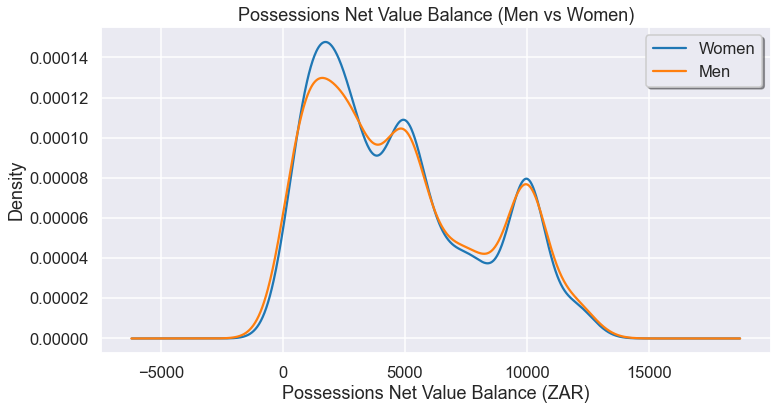

In [157]:
fem_posses = Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance']
male_posses = Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance']
plt.figure(figsize=(12,6))
plt_kde = fem_posses.plot(kind = 'kde', label = 'Women')
plt_kde = male_posses.plot(kind = 'kde', label = 'Men')
plt.title('Possessions Net Value Balance (Men vs Women)')
plt.xlabel('Possessions Net Value Balance (ZAR)'); plt.legend(shadow=True);

In [158]:
fem_mean_netposses = round(Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance'].mean(),2)
male_mean_netposses = round(Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance'].mean(),2)
#gen_mean_netposses = gen_mean_netposses[gen_mean_netposses>0.0]
print('Average possessions net value balance for women: {} \nAverage possessions net value balance for men: {}'.format(fem_mean_netposses,male_mean_netposses))

print("------------------------------------------------------")

fem_std_netposses = Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance'].std()
male_std_netposses = Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance'].std()
print('Possessions net value balance std for women: {} \nPossessions net value balance std for men: {}'.format(fem_std_netposses,male_std_netposses))

Average possessions net value balance for women: 4708.51 
Average possessions net value balance for men: 4801.37
------------------------------------------------------
Possessions net value balance std for women: 3323.469507492506 
Possessions net value balance std for men: 3389.499961955482


<ipython-input-158-462ec7ba5891>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_mean_netposses = round(Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance'].mean(),2)
<ipython-input-158-462ec7ba5891>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_mean_netposses = round(Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance'].mean(),2)
<ipython-input-158-462ec7ba5891>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_std_netposses = Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance'].std()
<ipython-input-158-462ec7ba5891>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_std_netposses = Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance'].std()


In [159]:
fem_possess_data = Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance']
male_possess_data = Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance']
u,p = stats.mannwhitneyu(fem_possess_data,male_possess_data)
print('Statistic=%.1f, p=%.3f' % (u, p))

Statistic=1075296.5, p=0.303


<ipython-input-159-87a1b1566714>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_possess_data = Asset_Details[Personal_Details['Gender'] == 'Female']['Possessions_Net_Value_Balance']
<ipython-input-159-87a1b1566714>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_possess_data = Asset_Details[Personal_Details['Gender'] == 'Male']['Possessions_Net_Value_Balance']


Given the result of a Mann-Whitney u-test, we fail to reject the null hypothesis that there is no difference between the average possessions net value balances of men and women. We find that there are slight differences across the possessions net value balances of men and women on average but not enough to hold any significance.
***

#### Does race play a role in determining one's income bracket and ability to generate wealth in South Africa?

* H<sub>0</sub> There is no difference between the monthly gross income of people in the white and african populations.
* H<sub>1</sub> There is a difference between the monthly gross income of people in the white and african populations.

In [172]:
# Here, we take samples of 150 rows for each population and find the mean monthly gross income

w5_afri_smpl = Income_Details.loc[Personal_Details['Population_Group']=="African",'Primary_Gross_Income_Month'].mean()
w5_col_smpl = Income_Details.loc[Personal_Details['Population_Group']=="Coloured",'Primary_Gross_Income_Month'].mean()
w5_asIn_smpl = Income_Details.loc[Personal_Details['Population_Group']=="Asian/Indian",'Primary_Gross_Income_Month'].mean()
w5_yt_smpl = Income_Details.loc[Personal_Details['Population_Group']=="White",'Primary_Gross_Income_Month'].mean()

list1 = [w5_afri_smpl]
list2 = [w5_yt_smpl]
list3 = [w5_col_smpl]
list4 = [w5_asIn_smpl]
incomeByRace = pd.DataFrame(list(zip(list1,list2, list3,list4)), index= ['2017'], columns = ["African","White", 'Coloured','Asian/Indian'])
incomeByRace

,African,White,Coloured,Asian/Indian
2017,6829.661854,21186.29863,6425.6625,11967.861111


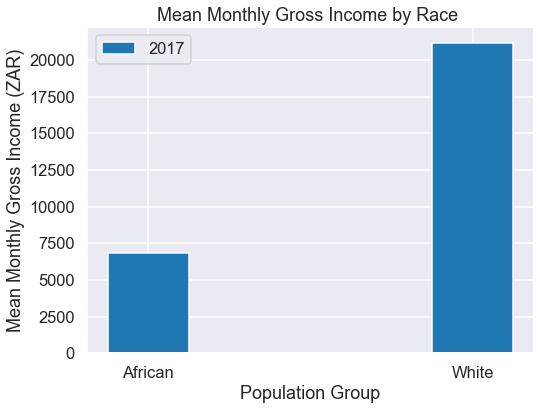

In [179]:
X = ['African','White']

Y_w5 = [6829.661854,21186.29863]

plt.figure(figsize=(8,6))

plt.bar(X, Y_w5, 0.25, label = '2017')

plt.xlabel("Population Group")
plt.ylabel("Mean Monthly Gross Income (ZAR)")
plt.title("Mean Monthly Gross Income by Race ")
plt.legend()
plt.show()

From the above results it could be said that being born within a particular race has an impact on where on the income scale one would end up. However, can the same be said for one's likelihood to accumulate wealth beyond their employment check? 
We will look into this in the follwoing section. <br>
*Note: We will only consider the white and african groups as they provide an overall view of the differences among races races.*

In [183]:
# Here we use the 2017 data to futher determine the impact of race on other sources of income.
other_income_variables = ["Share_Profit_Year","Extra_Income_Year","Secondary_Gross_Income", "Private_Retirement_Annuity_Amount","Rental_Income_Amount","Interest_Earnings_Amount", "Inheritances_Amount","Lobola_Amount", "Gifts_Amount", "Loan_Repayments_Amount", "Sale_Household_Goods_Amount", "Other_Income_Value"]
race_mean_otherIncome = Income_Details.groupby(Personal_Details['Population_Group'])[other_income_variables].mean()

raceList = ['White','African']
afri_vals = list(race_mean_otherIncome.loc['African',:].values)

yt_vals = list(race_mean_otherIncome.loc['White',:].values)

X_axis = np.arange(len(other_income_variables))

fig, ax = plt.subplots(figsize=(10,6))

plt.bar(raceList, afri_vals, 0.30, label = 'African')
plt.bar(raceList, yt_vals, 0.30, label = 'White')
  
plt.xticks(X_axis, other_income_variables)
plt.xlabel("Other Income")
plt.ylabel("Other Income Mean Values (ZAR)")
plt.title("Other Income Mean Values by Race")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

ValueError: Length of grouper (23892) and axis (6454) must be same length

In [187]:
# Here we explore the impact of race through the means of funds deployed by the government using the 2017 dataset.
govern_income_variables =["Disability_Grant_Amount","Child_Support_Amount","Foster_Care_Grant_Amount","Dependency_Grant_Amount","Grant_In_Aid_Amount","War_Veterans_Pension_Amount","UIF_Amount", "Workers_Compensation_Amount", "Provident_Fund_Amount"]
race_mean_governIncome = Income_Details.groupby(Personal_Details['Population_Group'])[govern_income_variables].mean()

afri_vals = list(race_mean_governIncome.loc['African',:].values)
#col_vals = list(race_mean_governIncome.loc['Coloured',:].values)
#asIn_vals = list(race_mean_governIncome.loc['Asian/Indian',:].values)
yt_vals = list(race_mean_governIncome.loc['White',:].values)

X_axis = np.arange(len(govern_income_variables))

fig = plt.subplots(figsize=(12,8))

plt.bar(X_axis - 0.2, afri_vals, 0.2, label = 'African')
#plt.bar(X_axis + 0.2, col_vals, 0.2, label = 'Coloured')
#plt.bar(X_axis - 0.4, asIn_vals, 0.2, label = 'Asian/Indian')
plt.bar(X_axis + 0.4, yt_vals, 0.2, label = 'White')

plt.xticks(X_axis, govern_income_variables)
plt.xlabel("Government-Provided Funds/Grants")
plt.ylabel("Government-Provided Funds Mean Values (ZAR)")
plt.title("Government-Provided Funds Mean Values by Race")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

ValueError: Length of grouper (23892) and axis (6454) must be same length

From the above graphs on a population group's other sources of income, it appears that the white population still dominates most areas of income outside the employment income. In the latter graph, it also appears that the white population are the biggest beneficiaries of the Provident fund compared to the other races. This is therefore telling of the racial inequality within South Africa. Therefore, due to this racial inequality, a person's race plays a role in one's abiility to accmulate wealth as South African adult.

In [185]:
race_mean_netposses = round(Asset_Details.groupby(Personal_Details['Population_Group'])['Possessions_Net_Value_Balance'].mean(),2)
race_mean_netposses = race_mean_netposses[race_mean_netposses>0.0]
race_mean_netposses

ValueError: Length of grouper (23892) and axis (2990) must be same length

In [186]:
Y = list(race_mean_netposses.values)
X = ['African ','Coloured','Asian/Indian','White','Other (specify)']
fig = plt.subplots(figsize=(12,8))
plt.bar(X,Y,label = 'Possessions Net Value Balance')
plt.xlabel("Population Group")
plt.legend()
plt.show()

NameError: name 'race_mean_netposses' is not defined